In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [14]:
#load dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# *Data Cleaning*



In [15]:
# Shape of the dataset
print("Rows:", df.shape[0], "| Columns:", df.shape[1])

Rows: 8807 | Columns: 12


In [16]:
#check the null missing value
print("The number of missing value")
print(df.isnull().sum())

The number of missing value
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [19]:
# Fill missing values in 'director' and 'cast' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df.dropna(subset=['duration'], inplace=True)

 Insight: We clean null values logically rather than removing them all, keeping dataset richness for EDA and recommendations.

In [20]:
print("After filling missing value")
print(df.isnull().sum())

After filling missing value
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


#Exploratory Data Analysis (EDA)

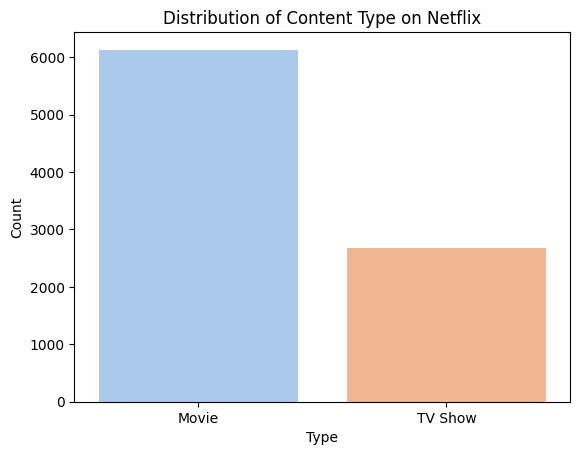

In [21]:
sns.countplot(data=df, x='type', palette='pastel')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

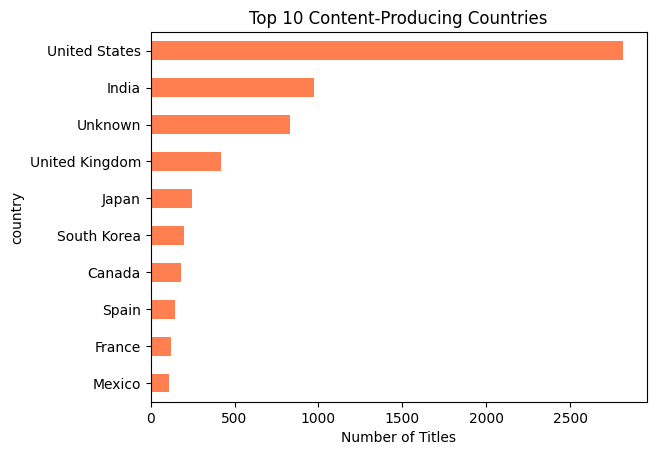

In [22]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='coral')
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()


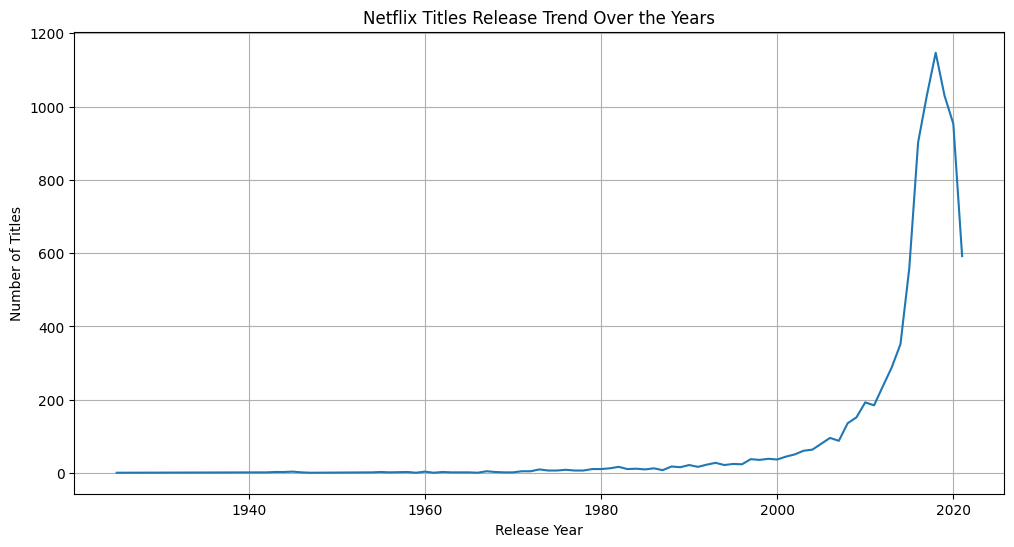

In [23]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title("Netflix Titles Release Trend Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


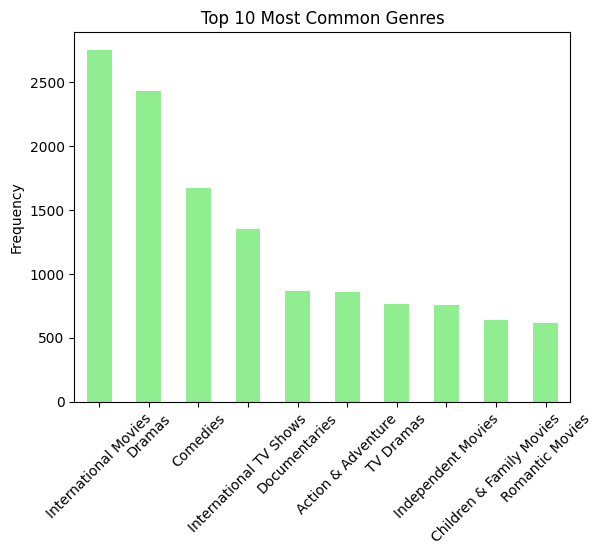

In [24]:
from collections import Counter

genres = ','.join(df['listed_in']).split(',')
genres_count = Counter([genre.strip() for genre in genres])
pd.Series(genres_count).sort_values(ascending=False).head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Most Common Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [65]:
# Remove null or empty descriptions
df_rec = df[df['description'].notnull()].copy()

# Reset index for convenience
df_rec.reset_index(drop=True, inplace=True)


In [66]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_rec['description'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


TF-IDF Matrix Shape: (8804, 18894)


In [67]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [68]:
indices = pd.Series(df_rec.index, index=df_rec['title'].str.lower()).drop_duplicates()

def recommend(title, cosine_sim=cosine_sim):
    title = title.lower()
    if title not in indices:
        return "Title not found."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Top 5 similar

    movie_indices = [i[0] for i in sim_scores]
    return df_rec['title'].iloc[movie_indices]


In [70]:
recommend("The Crown")


,title
1161,Elizabeth and Margaret: Love and Loyalty
8431,The Naked Gun: From the Files of Police Squad!
606,The Queen
8436,The Nineties
6678,Elizabeth at 90: A Family Tribute
